**Importing libraries: visualizaton, text analysis and classifiers**



In [61]:
import nltk  
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.graph_objs as go

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

import nltk
import string
import nltk.corpus
import nltk.stem.snowball
from nltk.corpus import wordnet
# Get default English stopwords and extend with punctuation
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(string.punctuation)
stopwords.append('')



In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, ImageColorGenerator

In [0]:
from google.colab import files
uploaded=files.upload()

In [0]:
happy = pd.read_csv('cleaned_hm.csv')
happy.head()

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category
0,27673,2053,24h,I went on a successful date with someone I fel...,I went on a successful date with someone I fel...,True,1,NaN,affection
1,27674,2,24h,I was happy when my son got 90% marks in his e...,I was happy when my son got 90% marks in his e...,True,1,NaN,affection
2,27675,1936,24h,I went to the gym this morning and did yoga.,I went to the gym this morning and did yoga.,True,1,NaN,exercise
3,27676,206,24h,We had a serious talk with some friends of our...,We had a serious talk with some friends of our...,True,2,bonding,bonding
4,27677,6227,24h,I went with grandchildren to butterfly display...,I went with grandchildren to butterfly display...,True,1,NaN,affection


In [0]:
from google.colab import files
uploaded=files.upload()

Saving demographic.csv to demographic (1).csv


In [0]:
demographic  = pd.read_csv('demographic.csv')
demographic .head()

,wid,age,country,gender,marital,parenthood
0,1,37.0,USA,m,married,y
1,2,29.0,IND,m,married,y
2,3,25,IND,m,single,n
3,4,32,USA,m,married,y
4,5,29,USA,m,married,y


**Dataset size and description**

In [0]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100535 entries, 0 to 100534
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   hmid                   100535 non-null  int64 
 1   wid                    100535 non-null  int64 
 2   reflection_period      100535 non-null  object
 3   original_hm            100535 non-null  object
 4   cleaned_hm             100535 non-null  object
 5   modified               100535 non-null  bool  
 6   num_sentence           100535 non-null  int64 
 7   ground_truth_category  14125 non-null   object
 8   predicted_category     100535 non-null  object
dtypes: bool(1), int64(3), object(5)
memory usage: 6.2+ MB


In [0]:
demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10844 entries, 0 to 10843
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   wid         10844 non-null  int64 
 1   age         10809 non-null  object
 2   country     10771 non-null  object
 3   gender      10812 non-null  object
 4   marital     10787 non-null  object
 5   parenthood  10813 non-null  object
dtypes: int64(1), object(5)
memory usage: 508.4+ KB


**Cleaning Demographic dataset | Performed only once**

In [0]:
# RUN THIS FUNCTION ONLY ONCE AND SAVE demographic_cleaned.csv IN YOUR ACTIVE DIRECTORY
# clean_string function to remove text string but keep number string, float and integer
# I ran the clean_string function below only once and saved the cleaned dataframe as demographic_cleaned.csv
# For all subsequent analysis, I then import demographic_cleaned.csv directly in order to avoid cleaning data each time.

def clean_string(df, column):
   for i in range(0,len(df)):
       if type(df[column][i])==str:
           df[column][i] = df[column][i].split('.')[0]
           if df[column][i].isdigit()==False:
               df[column][i]=50
   return df
demographic = clean_string(demographic, 'age')

demographic.head(2)
demographic.to_csv("demographic_cleaned.csv", index=False)


**Merging datasets**

In [0]:
happy = pd.merge(happy, demographic, on='wid', validate = 'm:1')
#pd.pivot_table(happy, values='hmid',index='reflection_period', aggfunc='count')
happy.head(3)

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category,age,country,gender,marital,parenthood
0,27673,2053,24h,I went on a successful date with someone I fel...,I went on a successful date with someone I fel...,True,1,NaN,affection,35,USA,m,single,n
1,27873,2053,24h,I played a new game that was fun and got to en...,I played a new game that was fun and got to en...,True,1,NaN,leisure,35,USA,m,single,n
2,28073,2053,24h,I listened to some music and heard an entire a...,I listened to some music and heard an entire a...,True,1,NaN,leisure,35,USA,m,single,n



**Descriptive Analysis** 

**2.1 Distribution**

In [0]:
from google.colab import files
uploaded=files.upload()

In [0]:
happy = pd.read_csv('cleaned_hm.csv')
demographic=pd.read_csv('demographic.csv')

In [0]:
happy = pd.merge(happy, demographic, on='wid', validate = 'm:1')
#pd.pivot_table(happy, values='hmid',index='reflection_period', aggfunc='count')
happy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100535 entries, 0 to 100534
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   hmid                   100535 non-null  int64 
 1   wid                    100535 non-null  int64 
 2   reflection_period      100535 non-null  object
 3   original_hm            100535 non-null  object
 4   cleaned_hm             100535 non-null  object
 5   modified               100535 non-null  bool  
 6   num_sentence           100535 non-null  int64 
 7   ground_truth_category  14125 non-null   object
 8   predicted_category     100535 non-null  object
 9   age                    100442 non-null  object
 10  country                100332 non-null  object
 11  gender                 100456 non-null  object
 12  marital                100378 non-null  object
 13  parenthood             100457 non-null  object
dtypes: bool(1), int64(3), object(10)
memory usage: 10.8+

In [0]:
happy

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category,age,country,gender,marital,parenthood
0,27673,2053,24h,I went on a successful date with someone I fel...,I went on a successful date with someone I fel...,True,1,NaN,affection,35,USA,m,single,n
1,27873,2053,24h,I played a new game that was fun and got to en...,I played a new game that was fun and got to en...,True,1,NaN,leisure,35,USA,m,single,n
2,28073,2053,24h,I listened to some music and heard an entire a...,I listened to some music and heard an entire a...,True,1,NaN,leisure,35,USA,m,single,n
3,33522,2053,24h,Went to see a movie with my friend,Went to see a movie with my friend,True,1,NaN,bonding,35,USA,m,single,n
4,34522,2053,24h,"Played guitar, learning a song on it","Played guitar, learning a song on it",True,1,NaN,leisure,35,USA,m,single,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100530,128251,11402,24h,Was told I was a great employee by my boss.,Was told I was a great employee by my boss.,True,1,NaN,achievement,32,USA,m,married,n
100531,128751,11402,24h,Fixed my car.,Fixed my car.,True,1,NaN,achievement,32,USA,m,married,n
100532,127759,11050,24h,Four year back I lost my job. Now I am living ...,Four year back I lost my job. Now I am living ...,True,6,NaN,achievement,65,IND,m,married,y
100533,128259,11050,24h,Yesterday evening I received a call from unkno...,Yesterday evening I received a call from unkno...,True,7,bonding,bonding,65,IND,m,married,y


In [0]:
happy['age']=happy['age'].astype(float)

In [0]:
happy=happy[happy['age']<150] # Drop rows with age exceeding 150 years

In [0]:
happy.loc[happy['age']<25,  'age']=0
happy.loc[happy['age']>=25, 'age']=1
happy

**Distribution of predicted_category, length and num_sentence**

In [0]:
#convert predicted_category to num and then execute the next code
happy.loc[happy['predicted_category']=='achievement', 'predicted_category']=3
happy.loc[happy['predicted_category']=='affection', 'predicted_category']=6
happy.loc[happy['predicted_category']=='bonding', 'predicted_category']=5
happy.loc[happy['predicted_category']=='enjoy_the_moment', 'predicted_category']=2
happy.loc[happy['predicted_category']=='exercise', 'predicted_category']=1
happy.loc[happy['predicted_category']=='leisure', 'predicted_category']=7
happy.loc[happy['predicted_category']=='nature', 'predicted_category']=4

In [0]:
#Create additional column with length of cleaned_hm
happy['length'] = happy['cleaned_hm'].apply(lambda x: len(x.split()))
#happy[happy['reflection_period']== '24h'].head(2)

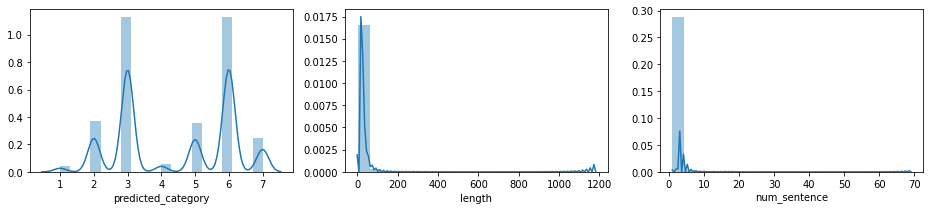

In [0]:
#happy_numerical = happy.drop({'hmid', 'wid', 'country', 'age', 'cleaned_hm', 'num_sentence'}, axis=1)
fig, (axis1,axis2, axis3) = plt.subplots(1,3,figsize=(16,3))
sns.distplot(happy['predicted_category'], bins=20, ax=axis1)
sns.distplot(happy['length'], bins=20, ax=axis2)
sns.distplot(happy['num_sentence'], bins=20, ax=axis3)

**2.2 Bi-variate analysis**

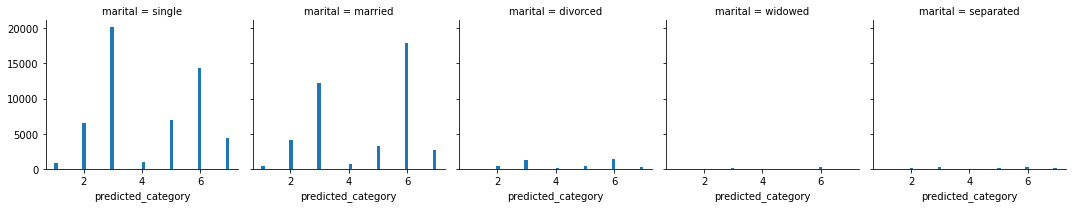

In [0]:
g = sns.FacetGrid(data=happy, col='marital')

g.map(plt.hist,'predicted_category', bins=50)

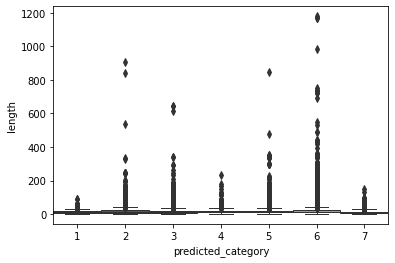

In [0]:
sns.boxplot(x='predicted_category', y='length', data=happy, palette = 'viridis',width=1,linewidth=1)

**CORRELATION_MAP**

In [0]:
# happy2 = happy.drop({'hmid', 'wid', 'num_sentence'}, axis=1)
# ax.set_yticklabels('auto', rotation='horizontal')
# sns.heatmap(happy2.groupby('predicted_category').mean().corr(), cmap='coolwarm',annot=True)



# df_happy_new = happy.drop({'hmid', 'wid', 'num_sentence'}, axis=1)
# fig, ax = plt.subplots(figsize=(5,5))
# ax.set_yticklabels('auto', rotation='horizontal')
# sns.heatmap(df_happy_new.groupby('predicted_category').mean().corr(), cmap='coolwarm',annot=True)



**Word Cloud before text processing**

In [0]:
happy=pd.read_csv('cleaned_hm.csv')

(-0.5, 3999.5, 2199.5, -0.5)

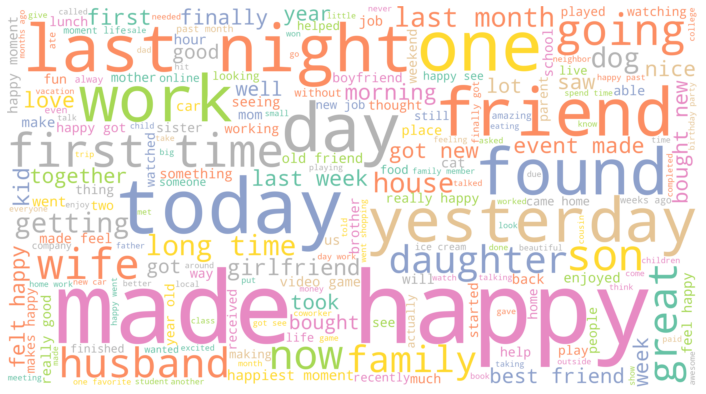

In [60]:
text = ' '.join(happy['cleaned_hm'].tolist())
wordcloud = WordCloud(background_color="white", height=2200, width=4000).generate(text)
plt.figure( figsize=(18,7) )
plt.imshow(wordcloud.recolor(colormap=plt.get_cmap('Set2')), interpolation='bilinear')
plt.axis("off")

**Text Processing and Analysis**

**1. Pre-Processing**

In [0]:
happy = pd.read_csv('cleaned_hm.csv')
happy=happy.head(5000) # Development/Testing: 5000
demographic = pd.read_csv('demographic_cleaned.csv')
#demographic = demographic[1:50000] #.sample(frac=0.1
# List of common words to remove, many thanks Chen-Chen for the initial inputs
nolist = ['happy', 'day', 'got', 'went', 'today', 'made', 'one', 'two', 'time', 'last', 'first', 'going',
'getting', 'took', 'found', 'lot', 'really', 'saw', 'see', 'month', 'week', 'day', 'yesterday',
'year', 'ago', 'now', 'still', 'since', 'something', 'great', 'good', 'long', 'thing', 'toi', 'without',
'yesteri', '2s', 'toand', 'ing', 'got', 'came', 'could', 'happiness', 'new', 'able', 'finally', 'like',
'old', 'years', 'many', '2', 'get', 'taj', 'nice', 'top', 'back']

happy = pd.merge(happy, demographic, on='wid')
happy.drop('age', axis=1, inplace=True)

#happy=happy[happy['age']<150] # Drop rows with age exceeding 150 years
#happy.loc[happy['age']<25,  'age'] = 0
#happy.loc[happy['age']>=25, 'age'] = 1

In [56]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]
    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)   
    # Now just remove any stopwords
    return [word for word in nopunc.split()
    if ((word.lower() not in stopwords) & (word.lower() not in nolist))]
# Apply to entire happy dataset, column cleaned_hm
happy['cleaned_hm'] = happy['cleaned_hm'].apply(text_process) #Sample of 10,000 rows
happy.head(1)

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category,country,gender,marital,parenthood
0,27673,2053,24h,I went on a successful date with someone I fel...,"[successful, date, someone, felt, sympathy, co...",True,1,NaN,affection,USA,m,single,n


In [0]:
# Convert list into string by joining words with a space
for i in range(0, len(happy)):
    happy['cleaned_hm'][i] = ' '.join(happy['cleaned_hm'][i])

**Word Cloud**

(-0.5, 3999.5, 2199.5, -0.5)

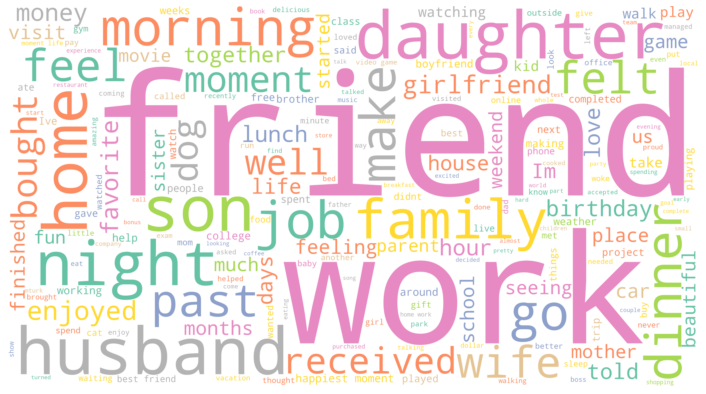

In [58]:
text = ' '.join(happy['cleaned_hm'].tolist())
wordcloud = WordCloud(background_color="white", height=2200, width=4000).generate(text)
plt.figure( figsize=(18,7) )
plt.imshow(wordcloud.recolor(colormap=plt.get_cmap('Set2')), interpolation='bilinear')
plt.axis("off")

**Key words analysis for selected label of predicted_category feature**

**This section extracts the 10 most frequently used keywords (excl. punctuations and stop words) for a selected label (number j) of the predicted_category.**

In [0]:
k = 8
# Extract unique values of predicted_category and add to a list in descending orders (by count of responses)
pivot_category = pd.pivot_table(happy, values='hmid',index=happy.iloc[:,k], aggfunc='count')
pivot_category.sort_values('hmid', axis=0, ascending=False, inplace=True, kind='quicksort', na_position='last')
Category_labels =pivot_category.T.columns.tolist()
if len(Category_labels)>10:
    Category_labels = Category_labels[0:9]
Category_labels

['achievement',
 'affection',
 'bonding',
 'enjoy_the_moment',
 'leisure',
 'nature',
 'exercise']

In [0]:
# Select text from this sub-category j (from above list) and convert into a string with spaces
j=1
text = ' '.join(happy[happy.iloc[:,k]==Category_labels[j]]['cleaned_hm'].tolist())

In [0]:
# Find frequency of each word in this text
# break the string into list of words, reset variables str2 and str3
str = text.split()         
str2 = []
str3 = pd.DataFrame([['A','B']], [Category_labels[j]], ['Word','Frequency'])
 
# Check for duplicate by looping until string values is not present in str
for word in str:
    if (word not in str2) & ((word+'s') not in str2):
        str2.append(word) # insert value in str2

# Create dataframe to store and report results
str3.iloc[0][0]=str2[0]
str3.iloc[0][1]=str.count(str2[0]) / len(text)
for i in range(1, len(str2)):
    # count the frequency of each word(present # in str2 and add with word to DataFrame
    freq = str.count(str2[i]) / len(text)
    str4 = pd.DataFrame([[str2[i],freq]], [Category_labels[j]], ['Word','Frequency'])
    str3 = str3.append(str4)  

str3.sort_values(by = 'Frequency', ascending=False, inplace=True)
str4 = str3.head(10)

**Key words analysis for all labels of multiple features**

The goal in this section is to extract the most frequent, meaningful keywords:

    For selected features: predicted_category, country, gender, marital,parenthood
    And within each feature, for each possible value or label. I limit countries to the top8 respondents.


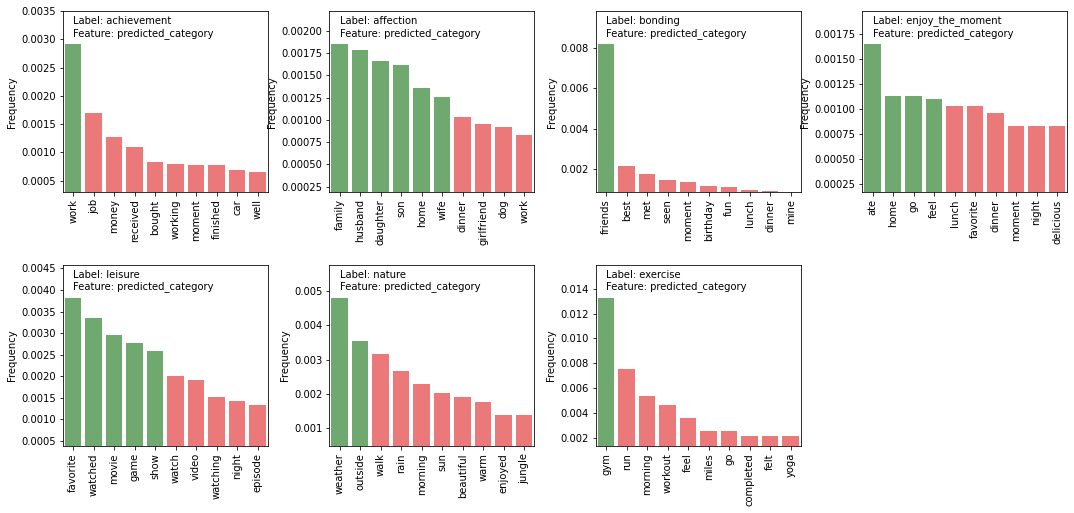

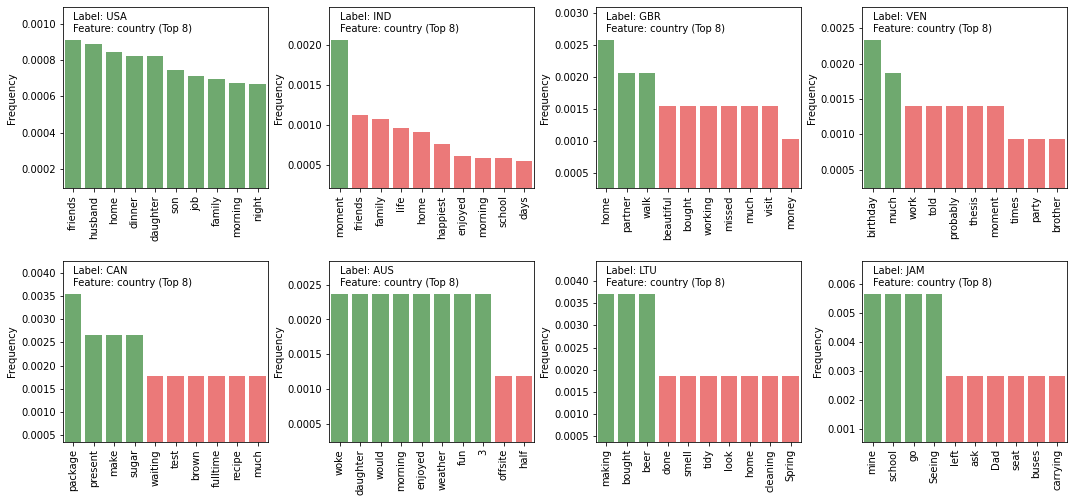

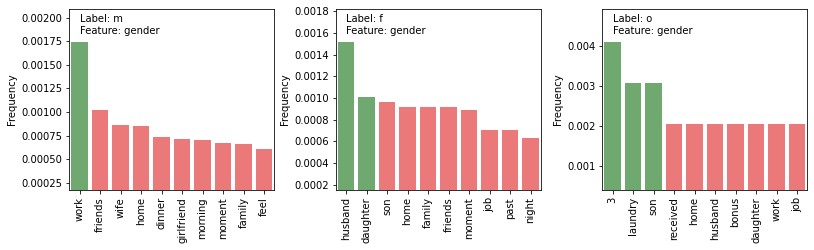

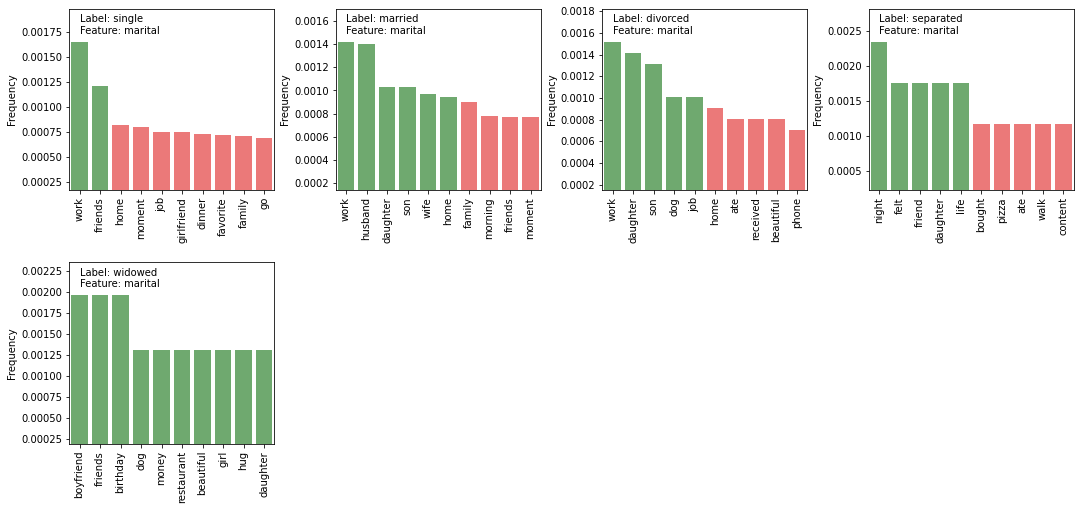

In [0]:
for k in range(8, 12): # Feature k
    
    # Extract unique values of predicted_category and add to a list in descending orders (by count of responses)
    pivot_category = pd.pivot_table(happy, values='hmid',index=happy.iloc[:,k], aggfunc='count')
    pivot_category.sort_values('hmid', axis=0, ascending=False, inplace=True, kind='quicksort', na_position='last')
    Category_labels =pivot_category.T.columns.tolist()
    add_title = ''
    if len(Category_labels)>10:
        Category_labels = Category_labels[0:8]
        add_title = '(Top 8)'

    j = 0 # Labels j for selected features
    str5={0:[]}
    fig = plt.figure(figsize=(18, 8))
    plt.title('Feature: '+happy.columns[k])
    fig.subplots_adjust(hspace=0.4, wspace=0.3)

    #fig, axis = plt.subplots(1,len(Category_labels),figsize=(18,3))
    for j in range(0, len(Category_labels)):
        l=j+1
        text = ' '.join(happy[happy.iloc[:,k]==Category_labels[j]]['cleaned_hm'].tolist())
        str = text.split()         
        str2 = []
        str3 = pd.DataFrame([['A','B']], [Category_labels[j]], ['Word','Frequency'])
    
    # Check for duplicate by looping until string values is not present in str
        for word in str:
            if (word not in str2) & ((word+'s') not in str2):
                str2.append(word) # insert value in str2

    # Create dataframe to store and report results
        str3.iloc[0][0]=str2[0]
        str3.iloc[0][1]=str.count(str2[0]) / len(text)
        for i in range(1, len(str2)):
            # count the frequency of each word(present # in str2 and add with word to DataFrame
            freq = str.count(str2[i]) / len(text) 
            str4 = pd.DataFrame([[str2[i],freq]], [Category_labels[j]], ['Word','Frequency'])
            str3 = str3.append(str4)  

        str3.sort_values(by = 'Frequency', ascending=False, inplace=True)
        str4 = str3.head(10)
        str5.update({j: str4}) #add result to the list str 5 to create graphs in next section 
    
        # Graphing
        plt.subplot(2, 4, l)
        objects = str5[j]['Word']
        x_pos = np.arange(len(objects))   
        colors = tuple(np.where(str5[j]['Frequency']>(0.66*str5[j]['Frequency'].max()), 'g', 'red'))
        sns.barplot(x=x_pos, y=str5[j]['Frequency'], palette=colors, alpha=0.6, data=happy);
        plt.text(0, (str5[j]['Frequency'].max()*1.05), 'Label: ' + Category_labels[j]
        +'\nFeature: '+happy.columns[k]+' '+add_title)
        plt.ylim((str5[j]['Frequency'].max()*0.1), (str5[j]['Frequency'].max()*1.2))
        plt.xticks(x_pos, objects, rotation=90)

plt.show()